## Purpose

To compute the ML performance of the proposed method in near real-time.

In [1]:
import json
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import string

## All Attack Files by Correlation Method

In [2]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_correlation_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_reverse_light_on_attack_3_masquerade_correlation_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_correlation_ROAD.json']


## Filtering Files Per Attacks File

In [8]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

dfs_correlated = []
dfs_max_engine = []
dfs_max_speedometer = []
dfs_rev_light_off = []
dfs_rev_light_on = []

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw
    
    df_ttw = df_ttw[::-1] # invert the order of dataframe rows


    if "correlated" in file:
        dfs_correlated.append(df_ttw)

    if "max_engine" in file:
        dfs_max_engine.append(df_ttw)

    if "speedometer" in file:
        dfs_max_speedometer.append(df_ttw)

    if "reverse_light_off" in file:
        dfs_rev_light_off.append(df_ttw)

    if "reverse_light_on" in file:
        dfs_rev_light_on.append(df_ttw)

results_reverse_light_on_attack_3_masquerade_correlation_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_correlation_ROAD.json
results_correlated_signal_attack_2_masquerade_correlation_ROAD.json
results_reverse_light_off_attack_3_masquerade_correlation_ROAD.json
results_max_speedometer_attack_3_masquerade_correlation_ROAD.json
results_reverse_light_off_attack_1_masquerade_correlation_ROAD.json
results_max_speedometer_attack_1_masquerade_correlation_ROAD.json
results_correlated_signal_attack_1_masquerade_correlation_ROAD.json
results_correlated_signal_attack_3_masquerade_correlation_ROAD.json
results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json
results_reverse_light_on_attack_1_masquerade_correlation_ROAD.json
results_max_speedometer_attack_2_masquerade_correlation_ROAD.json
results_reverse_light_on_attack_2_masquerade_correlation_ROAD.json


## Average Correlated Attack

In [9]:
method = "correlation"
attack = "correlated"

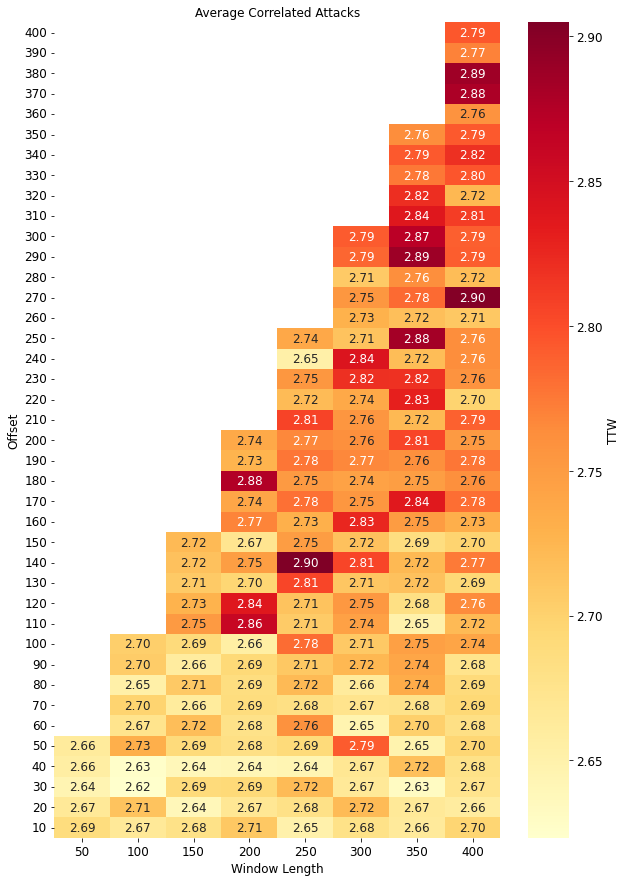

mean:  2.732446187724399
std:  0.06106717769620488
median:  2.721567257896428
min:  2.6232387457164275 ('30', '100')
max:  2.904836336771647 ('140', '250') 



In [10]:
df_to_inspect = dfs_correlated
df_ttw_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_ttw_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_ttw_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_ttw_avg))
print("std: ", np.nanstd(df_ttw_avg))
print("median: ", np.nanmedian(df_ttw_avg))
print("min: ", np.nanmin(df_ttw_avg), df_ttw_avg.stack().idxmin())
print("max: ", np.nanmax(df_ttw_avg), df_ttw_avg.stack().idxmax(), "\n")

## Average Max Engine Attack

In [11]:
method = "correlation"
attack = "max_engine"

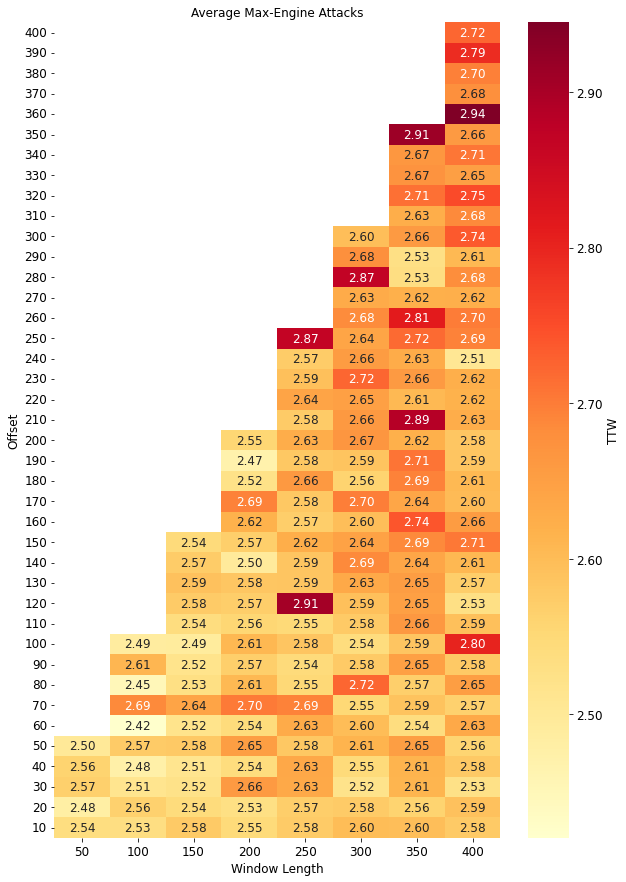

mean:  2.6163195366055683
std:  0.08535513279484874
median:  2.6007890701293945
min:  2.42068046747252 ('60', '100')
max:  2.9447972774505615 ('360', '400') 



In [12]:
df_to_inspect = dfs_max_engine
df_ttw_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_ttw_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_ttw_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Max-Engine Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)


plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_ttw_avg))
print("std: ", np.nanstd(df_ttw_avg))
print("median: ", np.nanmedian(df_ttw_avg))
print("min: ", np.nanmin(df_ttw_avg), df_ttw_avg.stack().idxmin())
print("max: ", np.nanmax(df_ttw_avg), df_ttw_avg.stack().idxmax(), "\n")

## Average Max Speedometer Attack

In [13]:
method = "correlation"
attack = "max_speedometer"

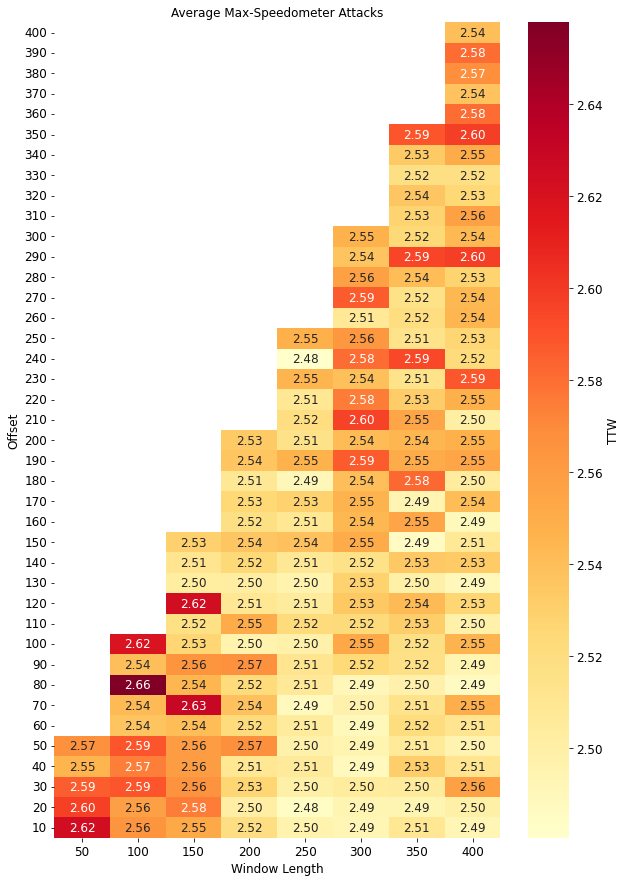

mean:  2.5342402627154357
std:  0.033189129468319645
median:  2.5302105459319204
min:  2.480545274563568 ('240', '250')
max:  2.6576704213969795 ('80', '100') 



In [14]:
df_to_inspect = dfs_max_speedometer
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Max-Speedometer Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Reverse Light Off Attack

In [15]:
method = "correlation"
attack = "light_off"

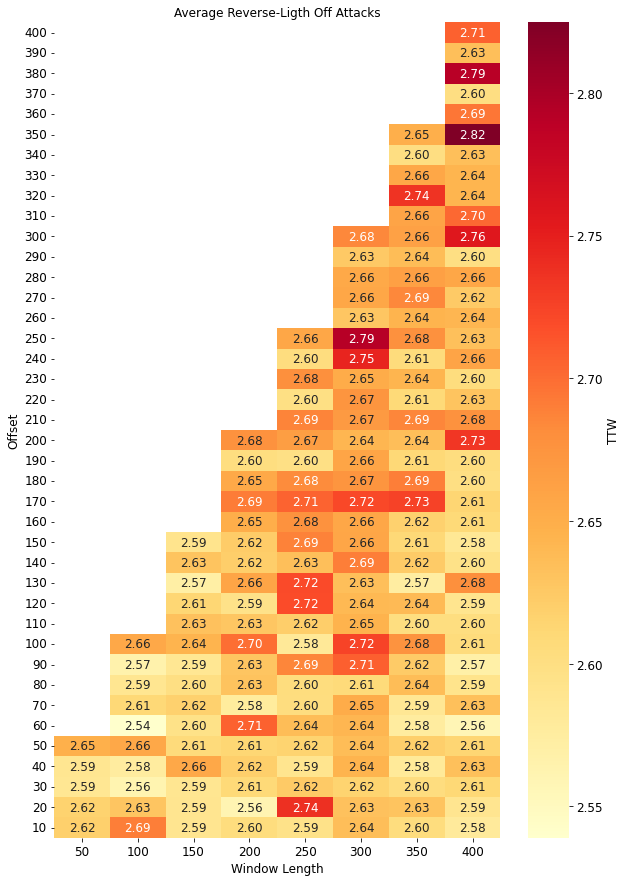

mean:  2.637946322919001
std:  0.04731486084177844
median:  2.6319263043714334
min:  2.5390283831583904 ('60', '100')
max:  2.8246455462669755 ('350', '400') 



In [16]:
df_to_inspect = dfs_rev_light_off
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Reverse-Ligth Off Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Reverse Light On Attack

In [17]:
method = "correlation"
attack = "light_on"

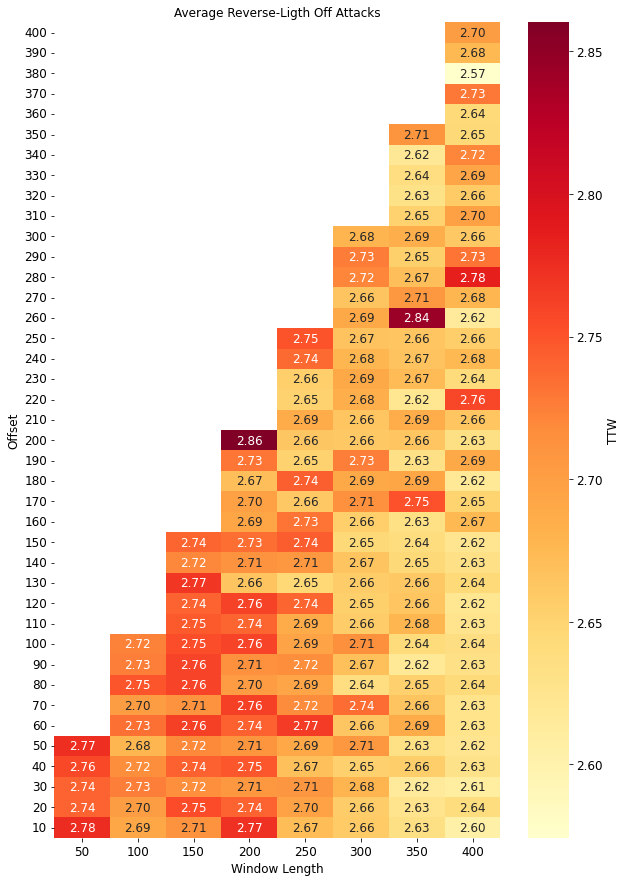

mean:  2.689045663123916
std:  0.047759634092452624
median:  2.686145221364592
min:  2.574224383742721 ('380', '400')
max:  2.8602006905797004 ('200', '200') 



In [18]:
df_to_inspect = dfs_rev_light_on
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Reverse-Ligth Off Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)


plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Single Figure Correlation

In [21]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("average_ttw_correlation_"):
        # if file.endswith("_distribution_ROAD.json"):
        files.append(file)
        # print(file)

files = sorted(files)
# print(files)
files = [files[0], files[3], files[4], files[1], files[2]]
print(files)

['average_ttw_correlation_method_correlated_attack.csv', 'average_ttw_correlation_method_max_engine_attack.csv', 'average_ttw_correlation_method_max_speedometer_attack.csv', 'average_ttw_correlation_method_light_off_attack.csv', 'average_ttw_correlation_method_light_on_attack.csv']


0 average_ttw_correlation_method_correlated_attack.csv
1 average_ttw_correlation_method_max_engine_attack.csv
2 average_ttw_correlation_method_max_speedometer_attack.csv
3 average_ttw_correlation_method_light_off_attack.csv
4 average_ttw_correlation_method_light_on_attack.csv


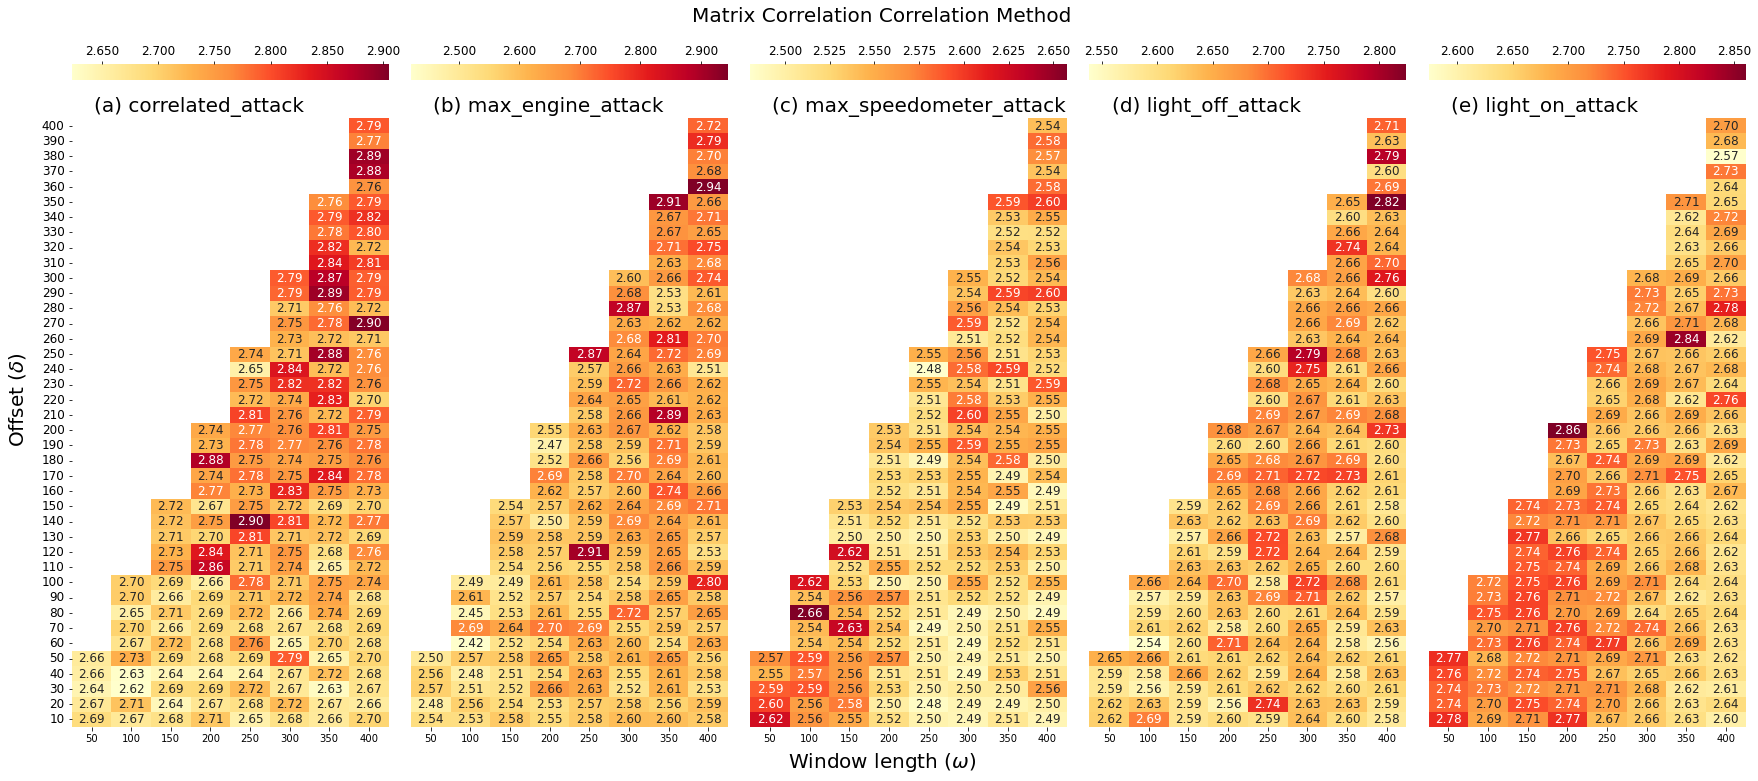

In [22]:
metrics = ["", "", "", "", ""]
coordinates = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]]

fig, axes = plt.subplots(1, 5, figsize=(30, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":0.07, "hspace":0.1})

# Set common labels
# axes.set_xlabel('common xlabel')
# axes.set_ylabel('common ylabel')
# fig.suptitle("Correlation Method", size=12)

for index, file in enumerate(files):

    print(index, file)

    df = pd.read_csv("../data/" + file, sep=" ", index_col=0)
    # display(df)
    # display(f"mean: {df.stack().dropna().mean()}, std: {df.stack().dropna().std()}, median: {df.stack().dropna().median()}")
    ax = index
    g = sns.heatmap(df, annot=True, cbar=True, cbar_kws={"label": metrics[index], "location":"top", "pad":0.05, "format":"%.3f"}, 
        annot_kws={"size": 12}, fmt=".2f", ax=axes[index], cmap="YlOrRd")

    # text annotation
    annotation = file.split("method")
    axes[index].text(0.07, 1.01, "(" + string.ascii_lowercase[index] + ")" + " " + annotation[1][1:-4], transform=axes[index].transAxes, size=20)
    
    # print(annotation)
    # print(annotation[1][1:-4])

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # # x-axis
    # g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12)

    # # y-axis
    if g.get_yticklabels():
        g.set_yticklabels(g.get_yticklabels(), fontsize=12)

    if index > 0:
        axes[index].tick_params(left=False)


# Set common labels
fig.text(0.5, 0.09, "Window length ($\omega$)", ha="center", va="center", fontsize=20)
fig.text(0.1, 0.45, "Offset ($\delta$)", ha="center", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, 0.83, "Matrix Correlation Correlation Method", ha="center", va="center", fontsize=20)


plt.savefig("../figs/" + "correlation_all_ttw_fig.pdf", dpi=200, bbox_inches="tight")
plt.show()

## All Attack Files by Distribution Method

In [23]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_distribution_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_max_speedometer_attack_3_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_2_masquerade_distribution_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_3_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_1_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_1_masquerade_distribution_ROAD.json']


## Filtering Files Per Attacks File

In [24]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

dfs_correlated = []
dfs_max_engine = []
dfs_max_speedometer = []
dfs_rev_light_off = []
dfs_rev_light_on = []

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw
    
    df_ttw = df_ttw[::-1] # invert the order of dataframe rows


    if "correlated" in file:
        dfs_correlated.append(df_ttw)

    if "max_engine" in file:
        dfs_max_engine.append(df_ttw)

    if "speedometer" in file:
        dfs_max_speedometer.append(df_ttw)

    if "reverse_light_off" in file:
        dfs_rev_light_off.append(df_ttw)

    if "reverse_light_on" in file:
        dfs_rev_light_on.append(df_ttw)

results_max_speedometer_attack_3_masquerade_distribution_ROAD.json
results_correlated_signal_attack_2_masquerade_distribution_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_distribution_ROAD.json
results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json
results_reverse_light_on_attack_1_masquerade_distribution_ROAD.json
results_reverse_light_off_attack_1_masquerade_distribution_ROAD.json
results_correlated_signal_attack_3_masquerade_distribution_ROAD.json
results_max_speedometer_attack_2_masquerade_distribution_ROAD.json
results_reverse_light_off_attack_3_masquerade_distribution_ROAD.json
results_reverse_light_off_attack_2_masquerade_distribution_ROAD.json
results_reverse_light_on_attack_2_masquerade_distribution_ROAD.json
results_correlated_signal_attack_1_masquerade_distribution_ROAD.json
results_max_speedometer_attack_1_masquerade_distribution_ROAD.json


## Average Correlated Attack

In [25]:
method = "distribution"
attack = "correlated"

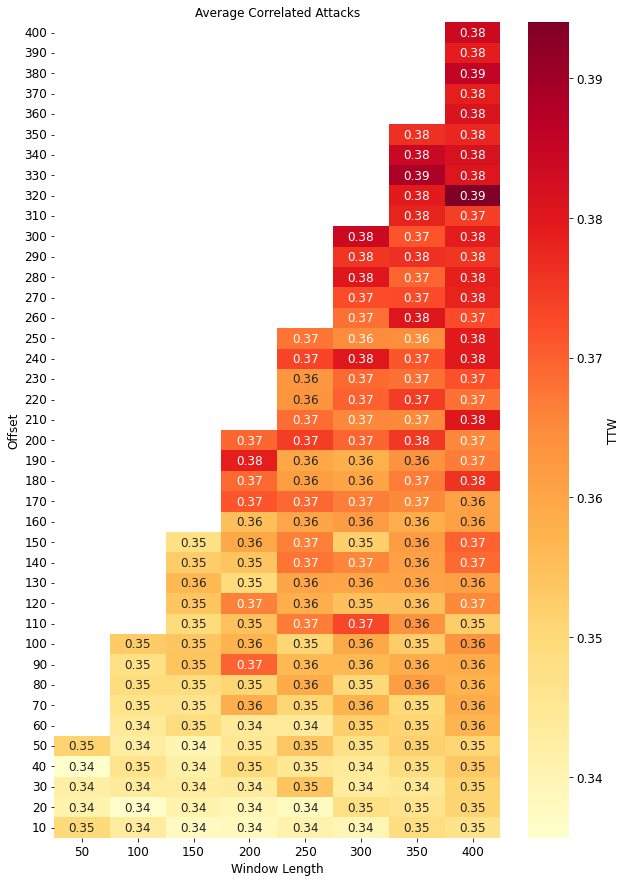

mean:  0.3604001233656601
std:  0.012864635449826795
median:  0.35982405203854095
min:  0.3356576927216561 ('40', '50')
max:  0.39397747026950825 ('320', '400') 



In [26]:
df_to_inspect = dfs_correlated
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)


plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Max Engine Attack

In [27]:
method = "distribution"
attack = "max_engine"

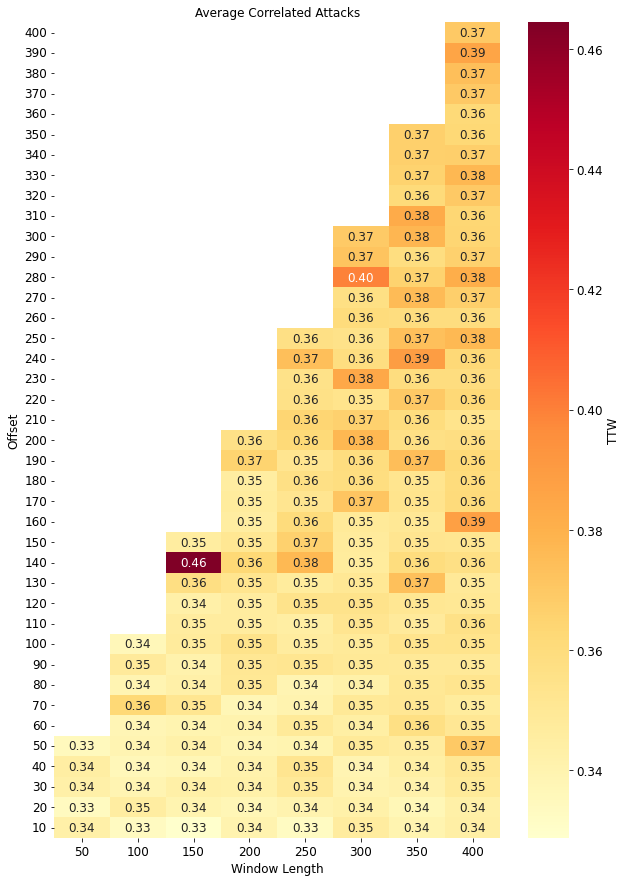

mean:  0.35491166002453883
std:  0.015133442454709968
median:  0.35222882316226045
min:  0.32874529923849954 ('10', '150')
max:  0.4644142953973067 ('140', '150') 



In [28]:
df_to_inspect = dfs_max_engine
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)


plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Max Speedometer Attack

In [29]:
method = "distribution"
attack = "max_speedometer"

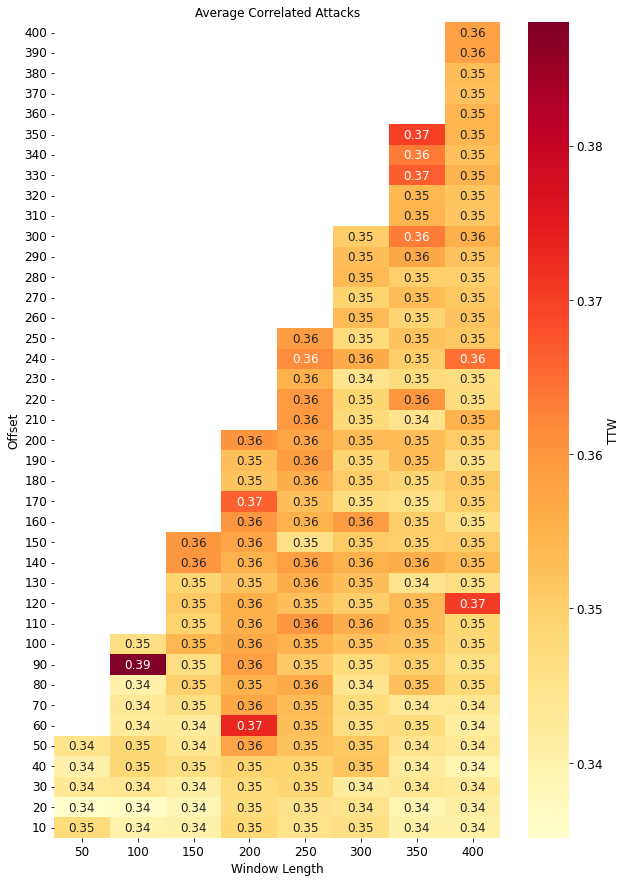

mean:  0.35108535642276134
std:  0.007011839503068661
median:  0.3509169008354698
min:  0.3351362025069992 ('20', '50')
max:  0.3879908793461097 ('90', '100') 



In [30]:
df_to_inspect = dfs_max_speedometer
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Reverse Light Off Attack

In [31]:
method = "distribution"
attack = "light_off"

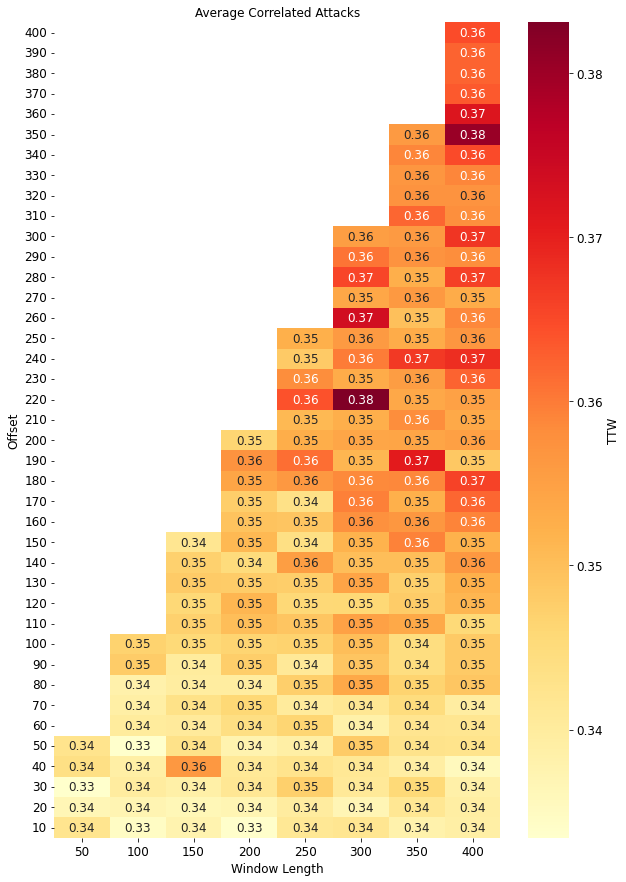

mean:  0.35004569245209466
std:  0.00930420633197401
median:  0.3489313340642952
min:  0.3334055141403243 ('30', '50')
max:  0.38308508483021847 ('220', '300') 



In [32]:
df_to_inspect = dfs_rev_light_off
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Reverse Light On Attack

In [33]:
method = "distribution"
attack = "light_on"

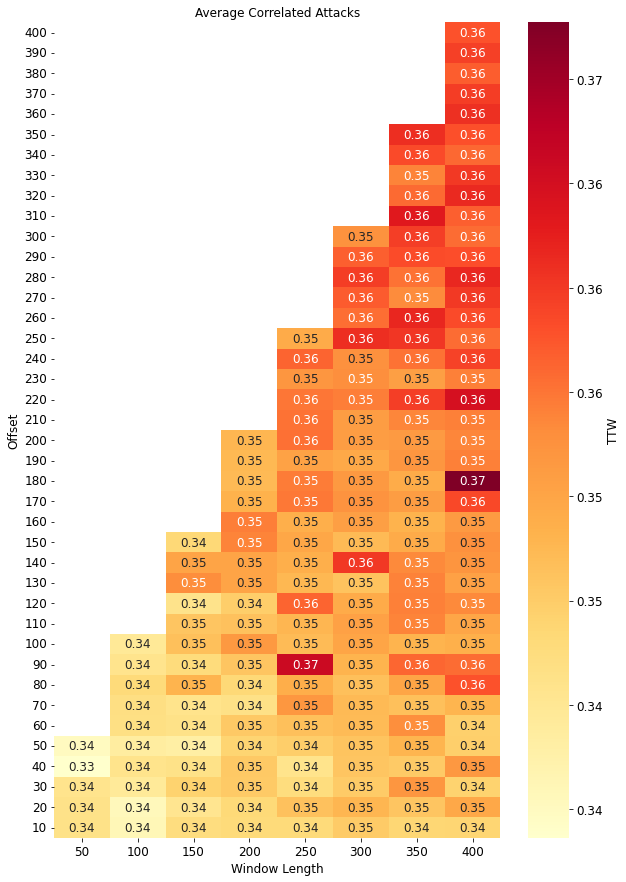

mean:  0.3502909434294257
std:  0.0066815214090066985
median:  0.3502082682949421
min:  0.3336333335564228 ('40', '50')
max:  0.3727176832774329 ('180', '400') 



In [34]:
df_to_inspect = dfs_rev_light_on
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Single Figure Distribution

In [36]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("average_ttw_distribution_"):
        # if file.endswith("_distribution_ROAD.json"):
        files.append(file)
        # print(file)

# files = sorted(files)
print(files)
files = [files[0], files[2], files[3], files[4], files[1]]
print(files)

['average_ttw_distribution_method_correlated_attack.csv', 'average_ttw_distribution_method_light_on_attack.csv', 'average_ttw_distribution_method_max_engine_attack.csv', 'average_ttw_distribution_method_max_speedometer_attack.csv', 'average_ttw_distribution_method_light_off_attack.csv']
['average_ttw_distribution_method_correlated_attack.csv', 'average_ttw_distribution_method_max_engine_attack.csv', 'average_ttw_distribution_method_max_speedometer_attack.csv', 'average_ttw_distribution_method_light_off_attack.csv', 'average_ttw_distribution_method_light_on_attack.csv']


0 average_ttw_distribution_method_correlated_attack.csv
1 average_ttw_distribution_method_max_engine_attack.csv
2 average_ttw_distribution_method_max_speedometer_attack.csv
3 average_ttw_distribution_method_light_off_attack.csv
4 average_ttw_distribution_method_light_on_attack.csv


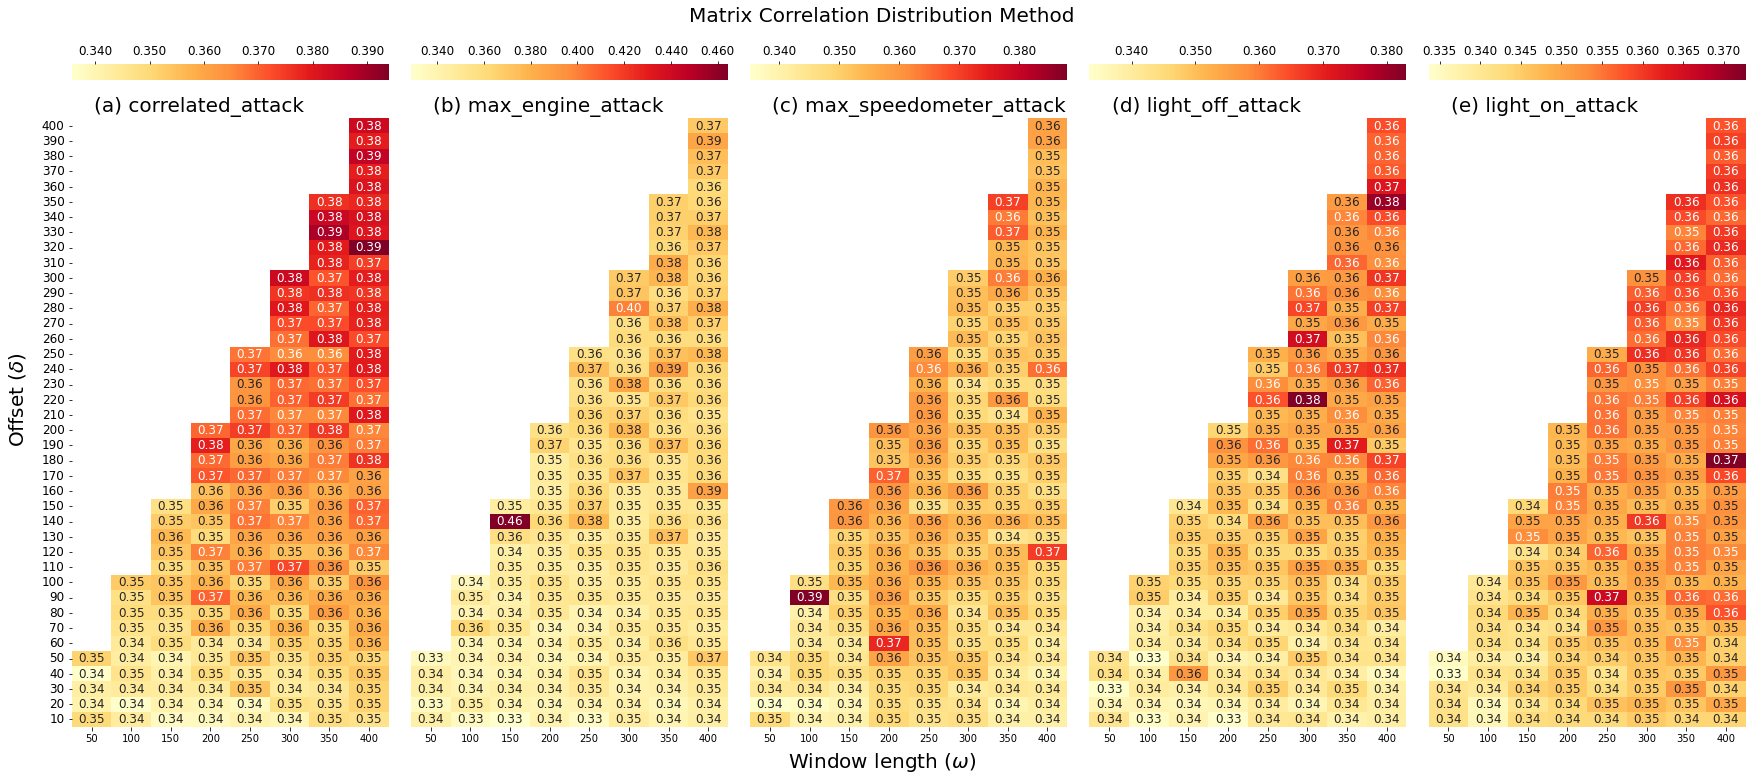

In [37]:
metrics = ["", "", "", "", ""]
coordinates = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]]

fig, axes = plt.subplots(1, 5, figsize=(30, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":0.07, "hspace":0.1})

# Set common labels
# axes.set_xlabel('common xlabel')
# axes.set_ylabel('common ylabel')
# fig.suptitle("Correlation Method", size=12)

for index, file in enumerate(files):

    print(index, file)

    df = pd.read_csv("../data/" + file, sep=" ", index_col=0)
    # display(df)
    # display(f"mean: {df.stack().dropna().mean()}, std: {df.stack().dropna().std()}, median: {df.stack().dropna().median()}")
    ax = index
    g = sns.heatmap(df, annot=True, cbar=True, cbar_kws={"label": metrics[index], "location":"top", "pad":0.05, "format":"%.3f"}, 
        annot_kws={"size": 12}, fmt=".2f", ax=axes[index], cmap="YlOrRd")

    # text annotation
    annotation = file.split("method")
    axes[index].text(0.07, 1.01, "(" + string.ascii_lowercase[index] + ")" + " " + annotation[1][1:-4], transform=axes[index].transAxes, size=20)
    
    # print(annotation)
    # print(annotation[1][1:-4])

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # # x-axis
    # g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12)

    # # y-axis
    if g.get_yticklabels():
        g.set_yticklabels(g.get_yticklabels(), fontsize=12)

    if index > 0:
        axes[index].tick_params(left=False)


# Set common labels
fig.text(0.5, 0.09, "Window length ($\omega$)", ha="center", va="center", fontsize=20)
fig.text(0.1, 0.45, "Offset ($\delta$)", ha="center", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, 0.83, "Matrix Correlation Distribution Method", ha="center", va="center", fontsize=20)


plt.savefig("../figs/" + "distribution_all_ttw_fig.pdf", dpi=200, bbox_inches="tight")
plt.show()

## All Attack Files by DBSCAN Method

In [3]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_DBSCAN_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_correlated_signal_attack_2_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_DBSCAN_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_1_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_1_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_3_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_2_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_DBSCAN_ROAD.json']


## Filtering Files Per Attacks File

In [4]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

dfs_correlated = []
dfs_max_engine = []
dfs_max_speedometer = []
dfs_rev_light_off = []
dfs_rev_light_on = []

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw
    
    df_ttw = df_ttw[::-1] # invert the order of dataframe rows


    if "correlated" in file:
        dfs_correlated.append(df_ttw)

    if "max_engine" in file:
        dfs_max_engine.append(df_ttw)

    if "speedometer" in file:
        dfs_max_speedometer.append(df_ttw)

    if "reverse_light_off" in file:
        dfs_rev_light_off.append(df_ttw)

    if "reverse_light_on" in file:
        dfs_rev_light_on.append(df_ttw)

results_correlated_signal_attack_2_masquerade_DBSCAN_ROAD.json
results_reverse_light_on_attack_2_masquerade_DBSCAN_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_DBSCAN_ROAD.json
results_max_speedometer_attack_1_masquerade_DBSCAN_ROAD.json
results_correlated_signal_attack_1_masquerade_DBSCAN_ROAD.json
results_reverse_light_on_attack_3_masquerade_DBSCAN_ROAD.json
results_reverse_light_off_attack_1_masquerade_DBSCAN_ROAD.json
results_reverse_light_off_attack_2_masquerade_DBSCAN_ROAD.json
results_correlated_signal_attack_3_masquerade_DBSCAN_ROAD.json
results_max_speedometer_attack_2_masquerade_DBSCAN_ROAD.json
results_reverse_light_off_attack_3_masquerade_DBSCAN_ROAD.json
results_max_speedometer_attack_3_masquerade_DBSCAN_ROAD.json
results_reverse_light_on_attack_1_masquerade_DBSCAN_ROAD.json


## Average Correlated Attack

In [5]:
method = "DBSCAN"
attack = "correlated"

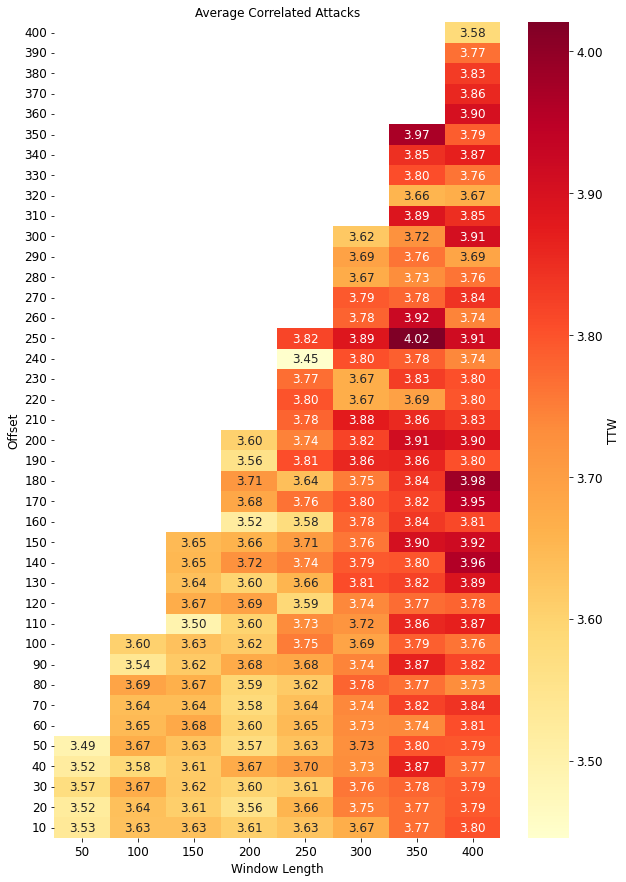

mean:  3.7324094564727948
std:  0.11012472091743837
median:  3.743397972419115
min:  3.4455766025771446 ('240', '250')
max:  4.020251925029452 ('250', '350') 



In [6]:
df_to_inspect = dfs_correlated
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)


plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Max Engine Attack

In [7]:
method = "DBSCAN"
attack = "max_engine"

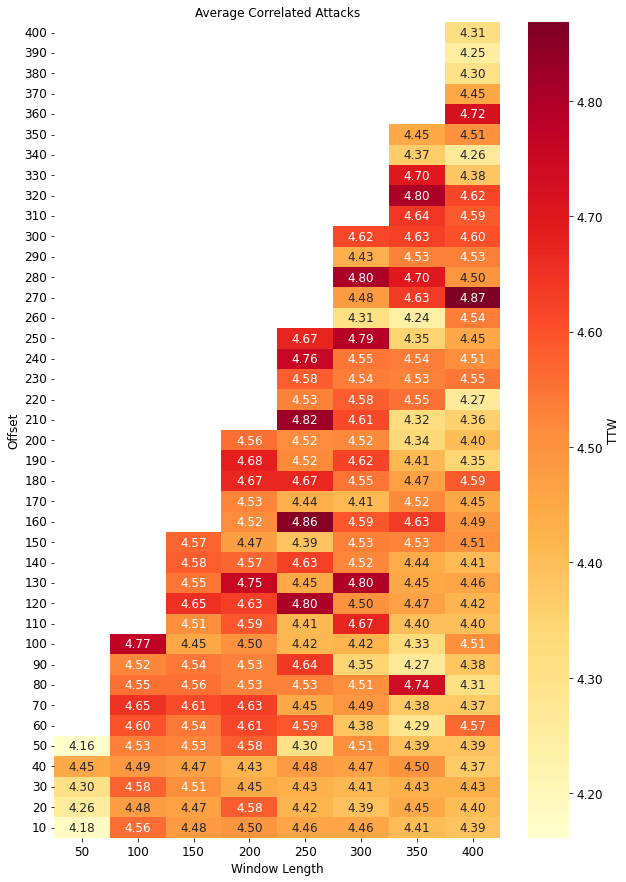

mean:  4.505619770495267
std:  0.13216586832340851
median:  4.509893448456474
min:  4.161444994119497 ('50', '50')
max:  4.868006706237793 ('270', '400') 



In [8]:
df_to_inspect = dfs_max_engine
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Max Speedometer Attack

In [9]:
method = "DBSCAN"
attack = "max_speedometer"

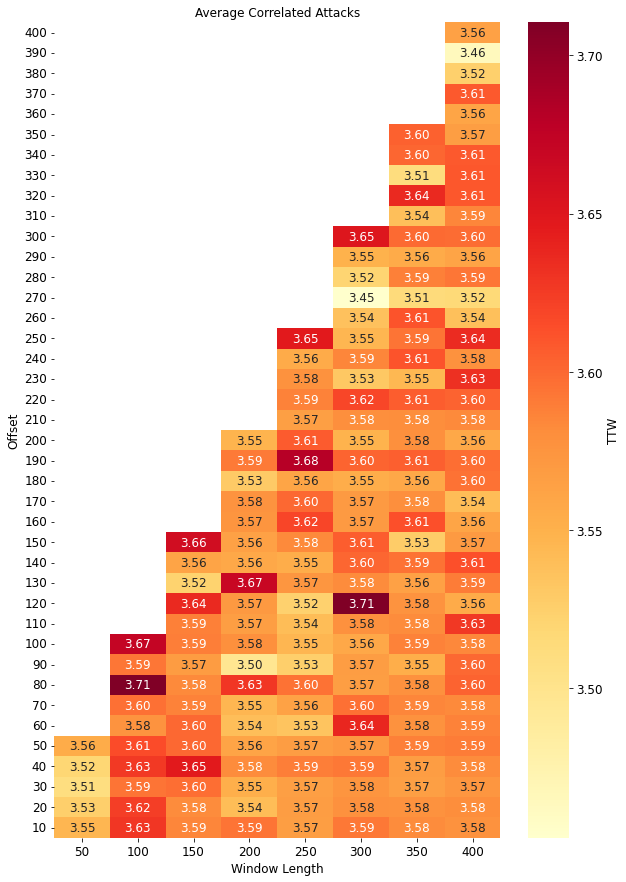

mean:  3.57969041158418
std:  0.0373796257016447
median:  3.5802391975807777
min:  3.452747497424568 ('270', '300')
max:  3.710402061674067 ('80', '100') 



In [10]:
df_to_inspect = dfs_max_speedometer
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Reverse Light Off Attack

In [11]:
method = "DBSCAN"
attack = "light_off"

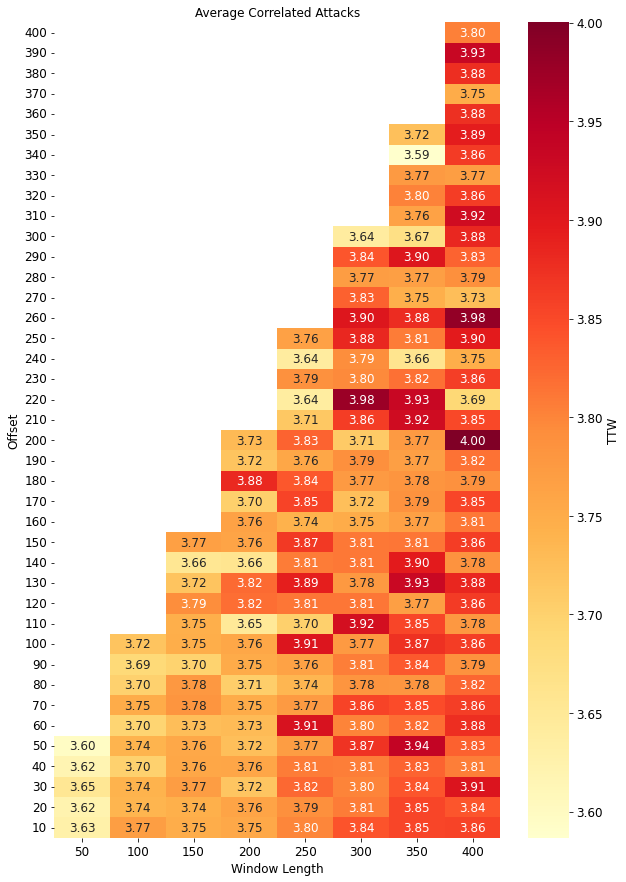

mean:  3.7921846682831193
std:  0.07741480724039644
median:  3.7878840834798986
min:  3.586752462251234 ('340', '350')
max:  4.000134127480643 ('200', '400') 



In [12]:
df_to_inspect = dfs_rev_light_off
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Reverse Light On Attack

In [13]:
method = "DBSCAN"
attack = "light_on"

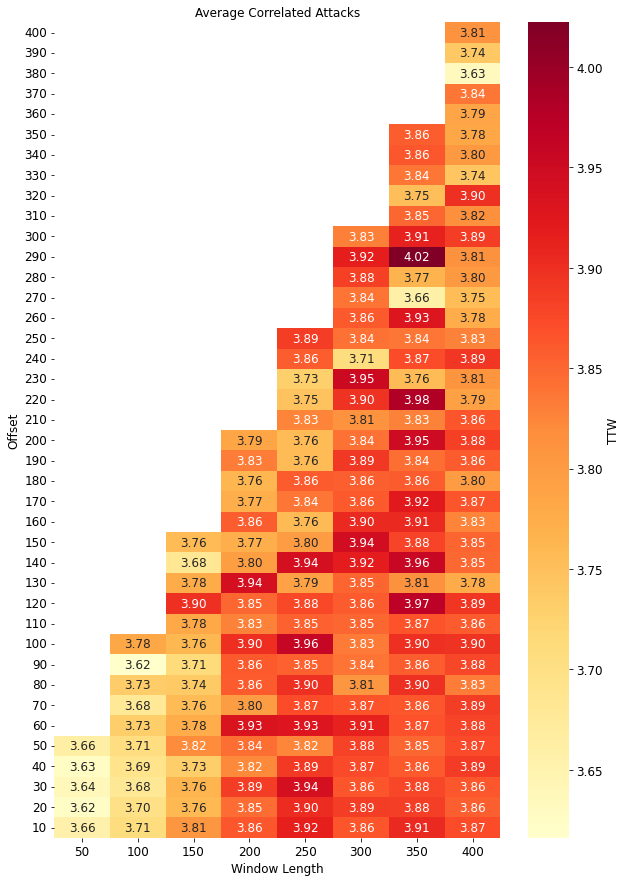

mean:  3.8305489697364434
std:  0.07667657355559533
median:  3.849882655041255
min:  3.6162100948219202 ('90', '100')
max:  4.022162377061415 ('290', '350') 



In [14]:
df_to_inspect = dfs_rev_light_on
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

# Single Figure DBSCAN

In [15]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("average_ttw_DBSCAN_"):
        # if file.endswith("_distribution_ROAD.json"):
        files.append(file) # print(file)
        
files = sorted(files)
# print(files)
files = [files[0], files[3], files[4], files[1], files[2]] 
print(files)

['average_ttw_DBSCAN_method_correlated_attack.csv', 'average_ttw_DBSCAN_method_max_engine_attack.csv', 'average_ttw_DBSCAN_method_max_speedometer_attack.csv', 'average_ttw_DBSCAN_method_light_off_attack.csv', 'average_ttw_DBSCAN_method_light_on_attack.csv']


0 average_ttw_DBSCAN_method_correlated_attack.csv
1 average_ttw_DBSCAN_method_max_engine_attack.csv
2 average_ttw_DBSCAN_method_max_speedometer_attack.csv
3 average_ttw_DBSCAN_method_light_off_attack.csv
4 average_ttw_DBSCAN_method_light_on_attack.csv


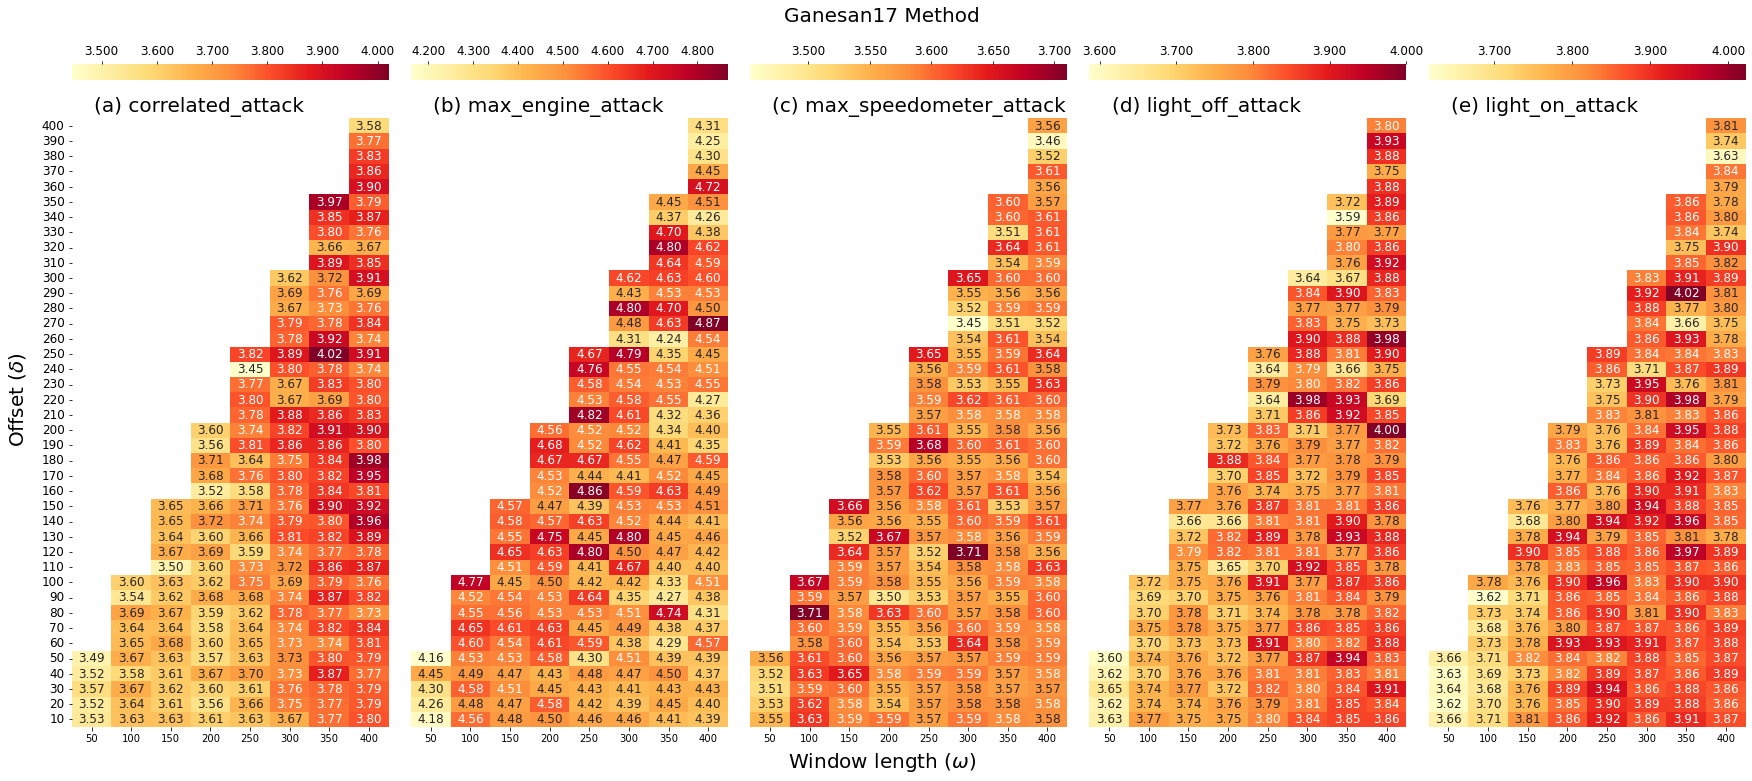

In [16]:
metrics = ["", "", "", "", ""]
coordinates = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]]

fig, axes = plt.subplots(1, 5, figsize=(30, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":0.07, "hspace":0.1})

# Set common labels

# axes.set_xlabel('common xlabel')
# axes.set_ylabel('common ylabel')
# fig.suptitle("Correlation Method", size=12)

for index, file in enumerate(files): 
    print(index, file)

    df = pd.read_csv("../data/" + file, sep=" ", index_col=0) # display(df)

    # display(f"mean: {df.stack().dropna().mean()}, std: {df.stack().dropna(). ↪std()}, median: {df.stack().dropna().median()}")
    ax = index
    g = sns.heatmap(df, annot=True, cbar=True, cbar_kws={"label": metrics[index], "location":"top", "pad":0.05, "format":"%.3f"}, annot_kws={"size": 12}, fmt=".2f", ax=axes[index], cmap="YlOrRd")
    
    # text annotation
    annotation = file.split("method")
    axes[index].text(0.07, 1.01, "(" + string.ascii_lowercase[index] + ")" + " " + annotation[1][1:-4], transform=axes[index].transAxes, size=20)
    
    # print(annotation)
    # print(annotation[1][1:-4])

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)
    
    # # x-axis
    # g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12)
    
    # # y-axis
    if g.get_yticklabels(): 
        g.set_yticklabels(g.get_yticklabels(), fontsize=12)

    if index > 0: 
         axes[index].tick_params(left=False)


# Set common labels
fig.text(0.5, 0.09, "Window length ($\omega$)", ha="center", va="center", fontsize=20)
fig.text(0.1, 0.45, "Offset ($\delta$)", ha="center", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, 0.83, "Ganesan17 Method", ha="center", va="center", fontsize=20)

plt.savefig("../figs/" + "DBSCAN_all_ttw_fig.pdf", dpi=200, bbox_inches="tight")
plt.show()

## All Attack Files by AHC Method

In [17]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_AHC_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_reverse_light_off_attack_1_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_2_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_AHC_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_1_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_1_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_2_masquerade_AHC_ROAD.json']


## Filtering Files Per Attacks File

In [18]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

dfs_correlated = []
dfs_max_engine = []
dfs_max_speedometer = []
dfs_rev_light_off = []
dfs_rev_light_on = []

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw
    
    df_ttw = df_ttw[::-1] # invert the order of dataframe rows


    if "correlated" in file:
        dfs_correlated.append(df_ttw)

    if "max_engine" in file:
        dfs_max_engine.append(df_ttw)

    if "speedometer" in file:
        dfs_max_speedometer.append(df_ttw)

    if "reverse_light_off" in file:
        dfs_rev_light_off.append(df_ttw)

    if "reverse_light_on" in file:
        dfs_rev_light_on.append(df_ttw)

results_reverse_light_off_attack_1_masquerade_AHC_ROAD.json
results_correlated_signal_attack_2_masquerade_AHC_ROAD.json
results_reverse_light_off_attack_3_masquerade_AHC_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_AHC_ROAD.json
results_max_speedometer_attack_1_masquerade_AHC_ROAD.json
results_max_speedometer_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_2_masquerade_AHC_ROAD.json
results_correlated_signal_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_1_masquerade_AHC_ROAD.json
results_correlated_signal_attack_1_masquerade_AHC_ROAD.json
results_reverse_light_off_attack_2_masquerade_AHC_ROAD.json
results_max_speedometer_attack_2_masquerade_AHC_ROAD.json


## Average Correlated Attack

In [19]:
method = "AHC"
attack = "correlated"

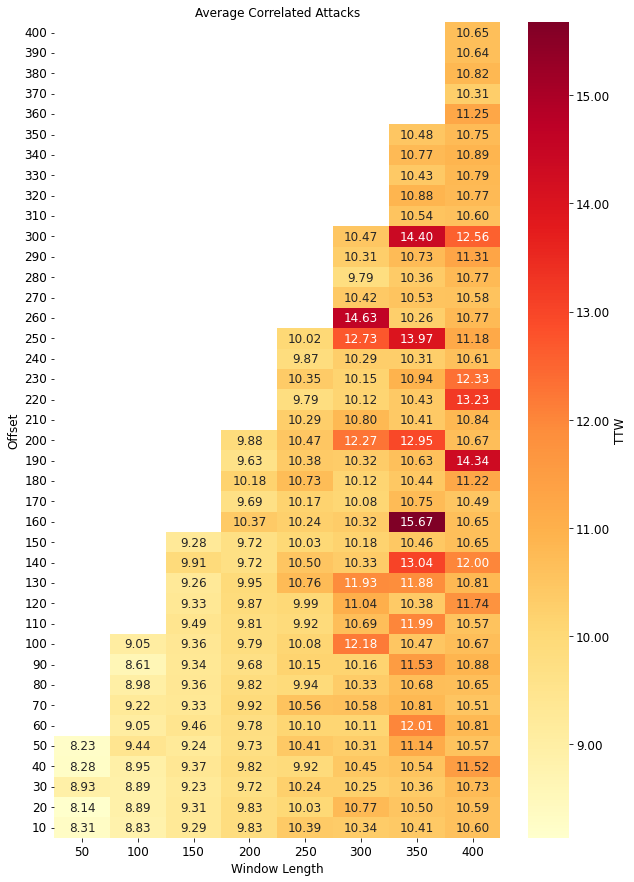

mean:  10.451907678934251
std:  1.1157197381568262
median:  10.381914951183177
min:  8.135074003562876 ('20', '50')
max:  15.672683515468568 ('160', '350') 



In [20]:
df_to_inspect = dfs_correlated
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Max Engine Attack

In [21]:
method = "AHC"
attack = "max_engine"

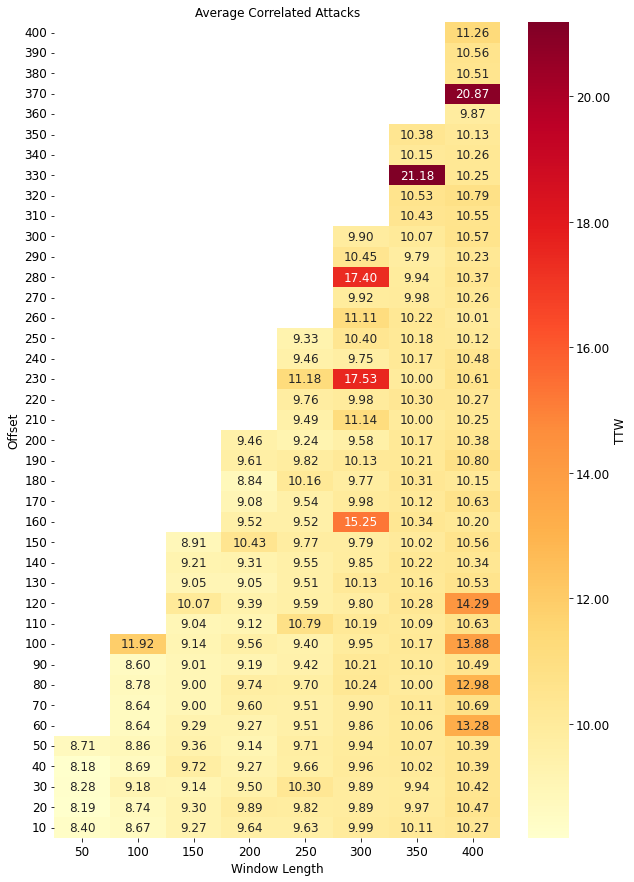

mean:  10.169687094096615
std:  1.6675400409599954
median:  9.980722268422445
min:  8.182144165039062 ('40', '50')
max:  21.177202463150024 ('330', '350') 



In [22]:
df_to_inspect = dfs_max_engine
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Max Speedometer Attack

In [23]:
method = "AHC"
attack = "max_speedometer"

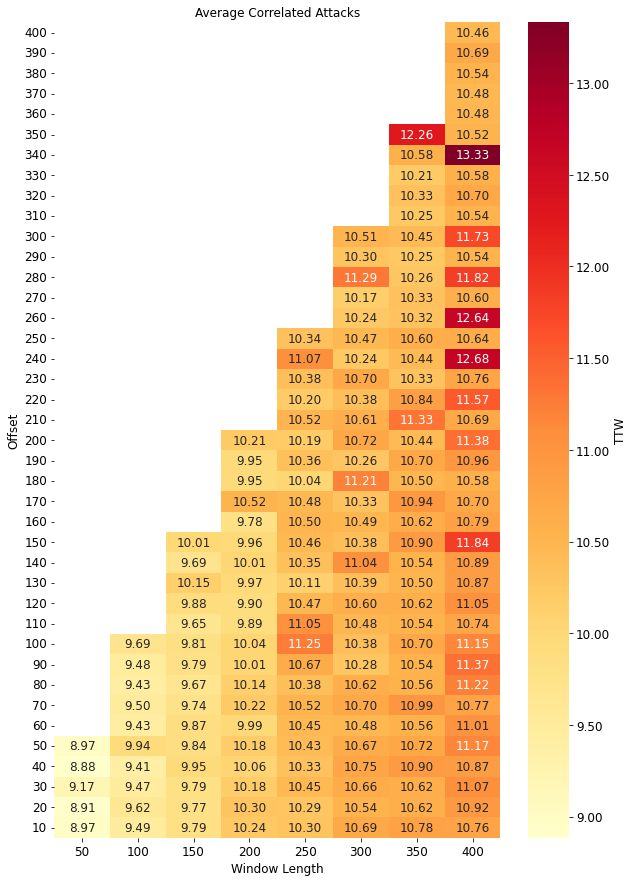

mean:  10.453548170576116
std:  0.6236332280050475
median:  10.475842570761376
min:  8.8844592761884 ('40', '50')
max:  13.330945601830116 ('340', '400') 



In [24]:
df_to_inspect = dfs_max_speedometer
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Average Reverse Light Off Attack

In [25]:
method = "AHC"
attack = "light_off"

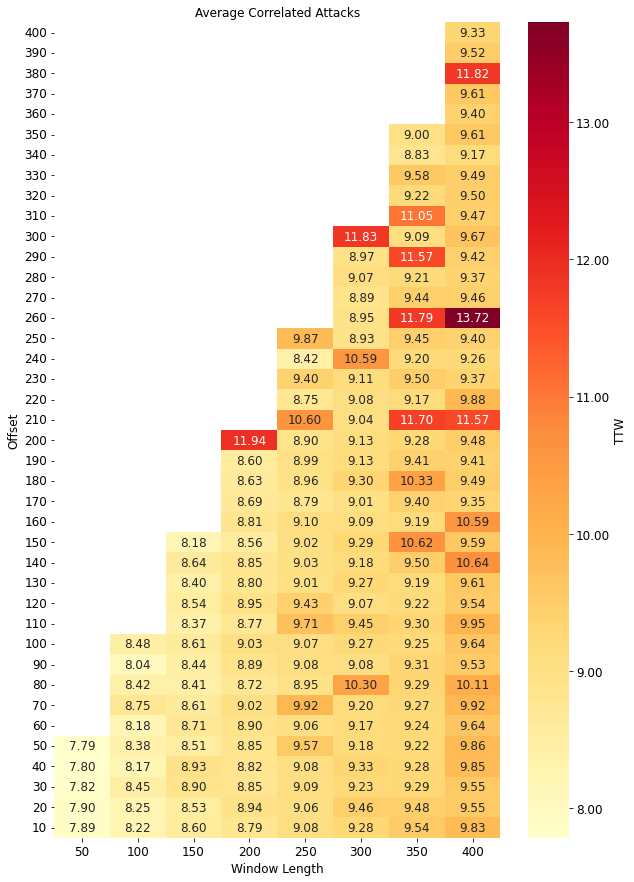

mean:  9.276000808494814
std:  0.8110233860123748
median:  9.189217080123168
min:  7.786118502973809 ('50', '50')
max:  13.724994027253354 ('260', '400') 



In [26]:
df_to_inspect = dfs_rev_light_off
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")


## Average Reverse Light On Attack

In [27]:
method = "AHC"
attack = "light_on"

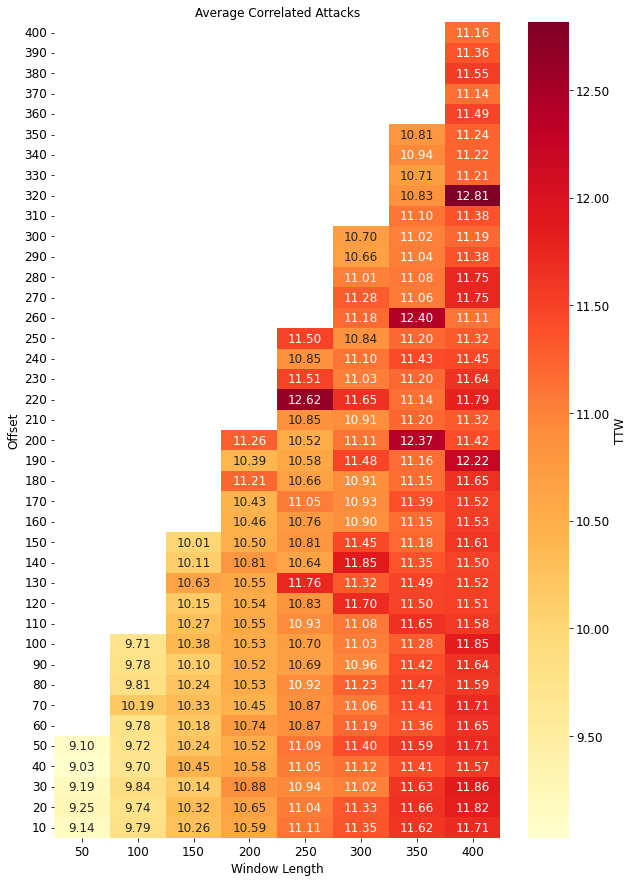

mean:  10.994276849292909
std:  0.6516520804994295
median:  11.092948057155589
min:  9.027396333686239 ('40', '50')
max:  12.813400748934297 ('320', '400') 



In [28]:
df_to_inspect = dfs_rev_light_on
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)
df_rocauc_avg.to_csv(f"../data/average_ttw_{method}_method_{attack}_attack.csv", sep=" ", header=True)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

plt.show()

# Compute basic statistics about elements in the frame
print("mean: ", np.nanmean(df_rocauc_avg))
print("std: ", np.nanstd(df_rocauc_avg))
print("median: ", np.nanmedian(df_rocauc_avg))
print("min: ", np.nanmin(df_rocauc_avg), df_rocauc_avg.stack().idxmin())
print("max: ", np.nanmax(df_rocauc_avg), df_rocauc_avg.stack().idxmax(), "\n")

## Single Figure AHC

In [29]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("average_ttw_AHC_"):
        # if file.endswith("_distribution_ROAD.json"):
        files.append(file) # print(file)

files = sorted(files)
print(files)

files = [files[0], files[3], files[4], files[1], files[2]]
print(files)

['average_ttw_AHC_method_correlated_attack.csv', 'average_ttw_AHC_method_light_off_attack.csv', 'average_ttw_AHC_method_light_on_attack.csv', 'average_ttw_AHC_method_max_engine_attack.csv', 'average_ttw_AHC_method_max_speedometer_attack.csv']
['average_ttw_AHC_method_correlated_attack.csv', 'average_ttw_AHC_method_max_engine_attack.csv', 'average_ttw_AHC_method_max_speedometer_attack.csv', 'average_ttw_AHC_method_light_off_attack.csv', 'average_ttw_AHC_method_light_on_attack.csv']


0 average_ttw_AHC_method_correlated_attack.csv
1 average_ttw_AHC_method_max_engine_attack.csv
2 average_ttw_AHC_method_max_speedometer_attack.csv
3 average_ttw_AHC_method_light_off_attack.csv
4 average_ttw_AHC_method_light_on_attack.csv


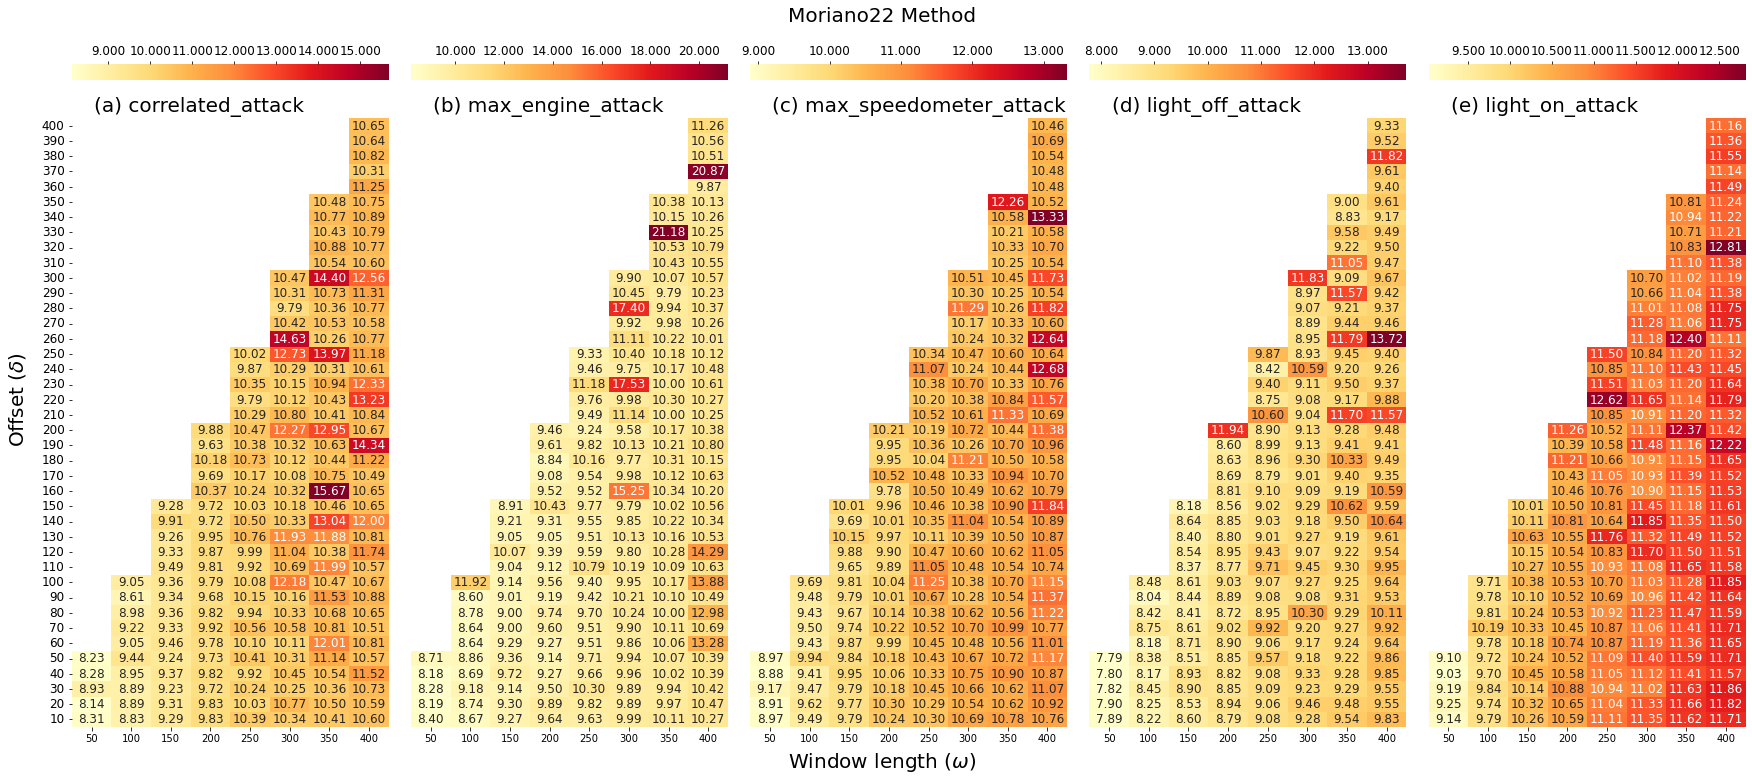

In [30]:
metrics = ["", "", "", "", ""]
coordinates = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]]

fig, axes = plt.subplots(1, 5, figsize=(30, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":0.07, "hspace":0.1})

# Set common labels

# axes.set_xlabel('common xlabel')
# axes.set_ylabel('common ylabel')
# fig.suptitle("Correlation Method", size=12)

for index, file in enumerate(files): 
    print(index, file)

    df = pd.read_csv("../data/" + file, sep=" ", index_col=0) # display(df)

    # display(f"mean: {df.stack().dropna().mean()}, std: {df.stack().dropna(). ↪std()}, median: {df.stack().dropna().median()}")
    ax = index
    g = sns.heatmap(df, annot=True, cbar=True, cbar_kws={"label": metrics[index], "location":"top", "pad":0.05, "format":"%.3f"}, annot_kws={"size": 12}, fmt=".2f", ax=axes[index], cmap="YlOrRd")
    
    # text annotation
    annotation = file.split("method")
    axes[index].text(0.07, 1.01, "(" + string.ascii_lowercase[index] + ")" + " " + annotation[1][1:-4], transform=axes[index].transAxes, size=20)
    
    # print(annotation)
    # print(annotation[1][1:-4])

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)
    
    # # x-axis
    # g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12)
    
    # # y-axis
    if g.get_yticklabels(): 
        g.set_yticklabels(g.get_yticklabels(), fontsize=12)

    if index > 0: 
         axes[index].tick_params(left=False)


# Set common labels
fig.text(0.5, 0.09, "Window length ($\omega$)", ha="center", va="center", fontsize=20)
fig.text(0.1, 0.45, "Offset ($\delta$)", ha="center", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, 0.83, "Moriano22 Method", ha="center", va="center", fontsize=20)

plt.savefig("../figs/" + "AHC_all_ttw_fig.pdf", dpi=200, bbox_inches="tight")
plt.show()
